In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pandas as pd
from tensorflow.keras.initializers import VarianceScaling
import matplotlib.pyplot as plt
!pip install idx2numpy
import idx2numpy
from google.colab.patches import cv2_imshow, cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz


!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz


!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz


!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

--2023-06-04 04:29:59--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:130:436c:6f75:6466:6c61:7265
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2023-06-04 04:29:59 (94.4 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-06-04 04:29:59--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:130:436c:6f75:6466:6c61:7265
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 

In [3]:
!gzip -d train-images-idx3-ubyte.gz

!gzip -d train-labels-idx1-ubyte.gz

!gzip -d t10k-images-idx3-ubyte.gz

!gzip -d t10k-labels-idx1-ubyte.gz

In [12]:
train_images_file = 'train-images-idx3-ubyte'
train_lable_file = 'train-labels-idx1-ubyte'
test_images_file = 't10k-images-idx3-ubyte'
test_lable_file = 't10k-labels-idx1-ubyte'

X_train = idx2numpy.convert_from_file(train_images_file)
train_labels = idx2numpy.convert_from_file(train_lable_file)
X_test = idx2numpy.convert_from_file(test_images_file)
test_labels = idx2numpy.convert_from_file(test_lable_file)

In [13]:
cv2_imshow(X_train[0])
print(train_labels.shape)
print(X_train.shape)

train_input = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
test_input = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
print(train_input.shape)
print(train_input)
print(test_labels.shape)
print(test_input.shape)

(60000,)
(60000, 28, 28)
(60000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10000,)
(10000, 784)


In [14]:
train_input_std = (train_input - np.mean(train_input, axis = 0)) / (np.std(train_input, axis = 0) + 1e-9)
test_input_std = (test_input - np.mean(test_input, axis = 0)) / (np.std(test_input, axis = 0) + 1e-9)
print(train_input.shape)
print(test_input.shape)
print(pd.DataFrame(train_input_std).describe())

(60000, 784)
(10000, 784)
           0        1        2        3        4        5        6        7    \
count  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           8        9    ...           774           775           776  \
count  60000.0  60000.0  ...  6.000000e+04  6.000000e+04  6.000000e+04   
mean       0.0      0.0  ...  6.158037e-18 -1.184238e-19  1.107262e-17   
std        0.0      0.

In [15]:
train_input_bias = np.concatenate([train_input_std, np.ones((train_input_std.shape[0], 1))], axis=1)
test_input_bias = np.concatenate([test_input_std, np.ones((test_input_std.shape[0], 1))], axis=1)
print(train_input_bias.shape)
print(test_input_bias.shape)

(60000, 785)
(10000, 785)


#Question 1 and Question 2

Network Width (k): 1, Dropout Rate (p): 1.0, Test Accuracy: 41.05%
Network Width (k): 5, Dropout Rate (p): 1.0, Test Accuracy: 89.09%
Network Width (k): 10, Dropout Rate (p): 1.0, Test Accuracy: 92.95%
Network Width (k): 20, Dropout Rate (p): 1.0, Test Accuracy: 94.88%
For Network Width (k): 40, Dropout Rate (p): 1.0, Training Accuracy: 99.99%
Network Width (k): 40, Dropout Rate (p): 1.0, Test Accuracy: 96.48%


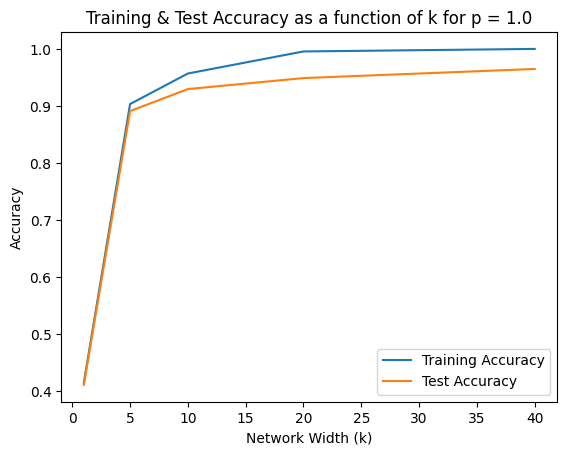

In [16]:
batch_size = 64
num_epochs = 80
learning_rate = 0.001
k_values = [1, 5, 10, 20, 40]
p_values = [1.0]

y_train = tf.keras.utils.to_categorical(train_labels, num_classes=10)
y_test = tf.keras.utils.to_categorical(test_labels, num_classes=10)

train_accuracies = []
test_accuracies = []

for p in p_values:
    for k in k_values:
        model = Sequential()
        model.add(Dense(k, activation='relu', input_shape=(785,), kernel_initializer=tf.keras.initializers.VarianceScaling(mode='fan_in')))
        model.add(Dropout(1.0 - p))
        model.add(Dense(10, activation='softmax'))

        model.compile(optimizer=Adam(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=[tf.keras.metrics.CategoricalAccuracy()])

        history = model.fit(train_input_bias, y_train, batch_size=batch_size, epochs=num_epochs, verbose=0, validation_split=0.1)

        train_accuracy = max(history.history['categorical_accuracy'])
        _, test_accuracy = model.evaluate(test_input_bias, y_test, verbose=0)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        if round(train_accuracy, 3) == 1.0:
            print(f"For Network Width (k): {k}, Dropout Rate (p): {p}, Training Accuracy: {train_accuracy * 100:.2f}%")
        print(f"Network Width (k): {k}, Dropout Rate (p): {p}, Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot the training accuracy as a function of k for different p values
plt.plot(k_values, train_accuracies, label="Training Accuracy")
plt.plot(k_values, test_accuracies, label="Test Accuracy")
plt.xlabel('Network Width (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Test Accuracy as a function of k for p = 1.0')
plt.show()


#The amount of optimization time needed for training convergence increases as p decreases. Lower p is harder to optimize for. The pair (k, p) = (40, 1.0) has the greatest test accuracy in the absence of noise (96.48%). The test accuracy is seen to change below due to random data shuffling.

Network Width (k): 1, Dropout Rate (p): 0.1, Test Accuracy: 26.06%
Network Width (k): 5, Dropout Rate (p): 0.1, Test Accuracy: 50.27%
Network Width (k): 10, Dropout Rate (p): 0.1, Test Accuracy: 74.86%
Network Width (k): 20, Dropout Rate (p): 0.1, Test Accuracy: 87.57%
Network Width (k): 40, Dropout Rate (p): 0.1, Test Accuracy: 90.11%

Network Width (k): 1, Dropout Rate (p): 0.5, Test Accuracy: 28.62%
Network Width (k): 5, Dropout Rate (p): 0.5, Test Accuracy: 82.48%
Network Width (k): 10, Dropout Rate (p): 0.5, Test Accuracy: 88.60%
Network Width (k): 20, Dropout Rate (p): 0.5, Test Accuracy: 93.32%
Network Width (k): 40, Dropout Rate (p): 0.5, Test Accuracy: 95.60%

Network Width (k): 1, Dropout Rate (p): 1.0, Test Accuracy: 37.51%
Network Width (k): 5, Dropout Rate (p): 1.0, Test Accuracy: 88.70%
Network Width (k): 10, Dropout Rate (p): 1.0, Test Accuracy: 92.97%
Network Width (k): 20, Dropout Rate (p): 1.0, Test Accuracy: 95.12%
For Network Width (k): 40, Dropout Rate (p): 1.0, Tr

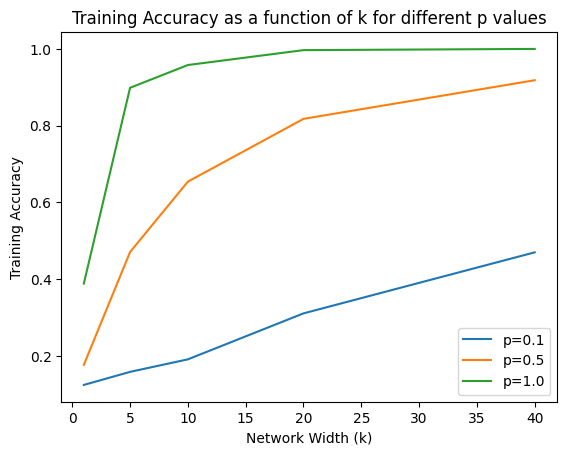

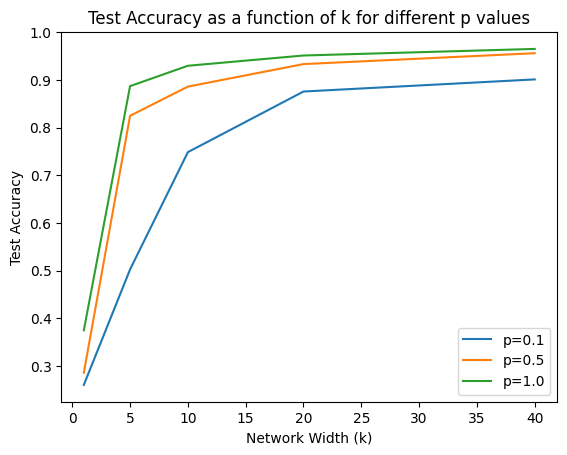

In [17]:
batch_size = 64
num_epochs = 80
learning_rate = 0.001
k_values = [1, 5, 10, 20, 40]
p_values = [0.1, 0.5, 1.0]

train_acc_p, test_acc_p = [], []

for p in p_values:
    train_accuracies = []
    test_accuracies = []
    for k in k_values:
        model = Sequential()
        model.add(Dense(k, activation='relu', input_shape=(785,), kernel_initializer=tf.keras.initializers.VarianceScaling(mode='fan_in')))
        model.add(Dropout(1.0 - p))
        model.add(Dense(10, activation='softmax'))

        model.compile(optimizer=Adam(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=[tf.keras.metrics.CategoricalAccuracy()])

        history = model.fit(train_input_bias, y_train, batch_size=batch_size, epochs=num_epochs, verbose=0, validation_split=0.1)

        train_accuracy = max(history.history['categorical_accuracy'])
        _, test_accuracy = model.evaluate(test_input_bias, y_test, verbose=0)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        if round(train_accuracy, 3) == 1.0:
            print(f"For Network Width (k): {k}, Dropout Rate (p): {p}, Training Accuracy: {train_accuracy * 100:.2f}%")
        print(f"Network Width (k): {k}, Dropout Rate (p): {p}, Test Accuracy: {test_accuracy * 100:.2f}%")

    train_acc_p.append(train_accuracies)
    test_acc_p.append(test_accuracies)
    print()

# Plot the training accuracy as a function of k for different p values
for i, p in enumerate(p_values):
    plt.plot(k_values, train_acc_p[i], label=f"p={p}")

plt.xlabel('Network Width (k)')
plt.ylabel('Training Accuracy')
plt.legend()
plt.title('Training Accuracy as a function of k for different p values')
plt.show()

for i, p in enumerate(p_values):
    plt.plot(k_values, test_acc_p[i], label=f"p={p}")

plt.xlabel('Network Width (k)')
plt.ylabel('Test Accuracy')
plt.legend()
plt.title('Test Accuracy as a function of k for different p values')
plt.show()


#Question 3

#Now we add the noise. With noise the best accuracy is for (k,p) = (40, 0.5) which is 92.10%

Network Width (k): 1, Dropout Rate (p): 0.1, Test Accuracy: 11.35%
Network Width (k): 5, Dropout Rate (p): 0.1, Test Accuracy: 58.65%
Network Width (k): 10, Dropout Rate (p): 0.1, Test Accuracy: 64.04%
Network Width (k): 20, Dropout Rate (p): 0.1, Test Accuracy: 80.66%
Network Width (k): 40, Dropout Rate (p): 0.1, Test Accuracy: 88.81%
Network Width (k): 1, Dropout Rate (p): 0.5, Test Accuracy: 20.96%
Network Width (k): 5, Dropout Rate (p): 0.5, Test Accuracy: 75.46%
Network Width (k): 10, Dropout Rate (p): 0.5, Test Accuracy: 89.01%
Network Width (k): 20, Dropout Rate (p): 0.5, Test Accuracy: 90.81%
Network Width (k): 40, Dropout Rate (p): 0.5, Test Accuracy: 92.10%
Network Width (k): 1, Dropout Rate (p): 1.0, Test Accuracy: 24.19%
Network Width (k): 5, Dropout Rate (p): 1.0, Test Accuracy: 83.82%
Network Width (k): 10, Dropout Rate (p): 1.0, Test Accuracy: 88.92%
Network Width (k): 20, Dropout Rate (p): 1.0, Test Accuracy: 89.80%
Network Width (k): 40, Dropout Rate (p): 1.0, Test Acc

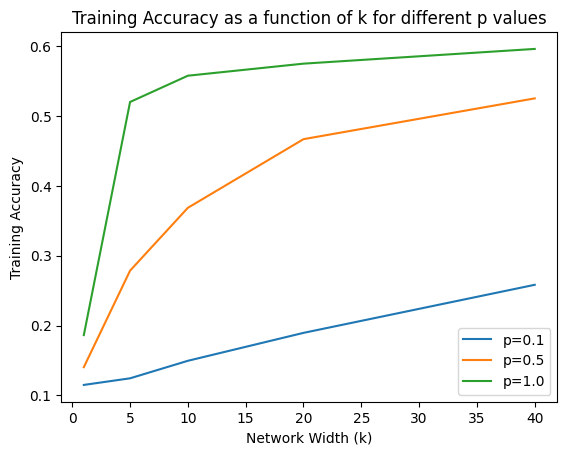

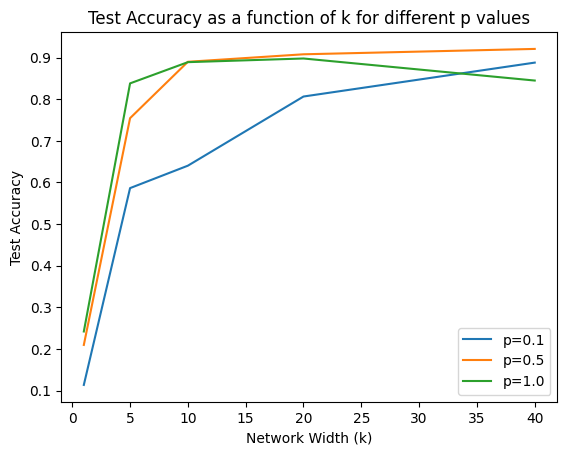

In [18]:
batch_size = 64
num_epochs = 80
learning_rate = 0.001
k_values = [1, 5, 10, 20, 40]
p_values = [0.1, 0.5, 1.0]

y_train = train_labels.copy()

num_examples = train_input_bias.shape[0]
num_noisy_examples = int(0.4 * num_examples)  # 40% of training examples
noisy_indices = np.random.choice(num_examples, num_noisy_examples, replace=False)

# Generate new labels for the noisy examples
new_labels = np.random.randint(low=0, high=10, size=num_noisy_examples)
original_labels = train_labels[noisy_indices]

for i in range(num_noisy_examples):
    while new_labels[i] == original_labels[i]:
        new_labels[i] = np.random.randint(low=0, high=10)

# Assign the new labels to the noisy examples
y_train[noisy_indices] = new_labels

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(test_labels, num_classes=10)

train_acc_p, test_acc_p = [], []

for p in p_values:
    train_accuracies = []
    test_accuracies = []
    for k in k_values:
        model = Sequential()
        model.add(Dense(k, activation='relu', input_shape=(785,), kernel_initializer=tf.keras.initializers.VarianceScaling(mode='fan_in')))
        model.add(Dropout(1.0 - p))
        model.add(Dense(10, activation='softmax'))

        model.compile(optimizer=Adam(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=[tf.keras.metrics.CategoricalAccuracy()])

        history = model.fit(train_input_bias, y_train, batch_size=batch_size, epochs=num_epochs, verbose=0, validation_split=0.1)

        train_accuracy = max(history.history['categorical_accuracy'])
        _, test_accuracy = model.evaluate(test_input_bias, y_test, verbose=0)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        if round(train_accuracy, 3) == 1.0:
            print(f"For Network Width (k): {k}, Dropout Rate (p): {p}, Training Accuracy: {train_accuracy * 100:.2f}%")
        print(f"Network Width (k): {k}, Dropout Rate (p): {p}, Test Accuracy: {test_accuracy * 100:.2f}%")

    train_acc_p.append(train_accuracies)
    test_acc_p.append(test_accuracies)

# Plot the training accuracy as a function of k for different p values
for i, p in enumerate(p_values):
    plt.plot(k_values, train_acc_p[i], label=f"p={p}")

plt.xlabel('Network Width (k)')
plt.ylabel('Training Accuracy')
plt.legend()
plt.title('Training Accuracy as a function of k for different p values')
plt.show()

for i, p in enumerate(p_values):
    plt.plot(k_values, test_acc_p[i], label=f"p={p}")

plt.xlabel('Network Width (k)')
plt.ylabel('Test Accuracy')
plt.legend()
plt.title('Test Accuracy as a function of k for different p values')
plt.show()
